In [1]:
import scipy 
import sklearn
#from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from mat73 import loadmat
import numpy as np


from skimage.transform import resize
from PIL import Image
import cv2

In [2]:
paths = glob.glob(".\\Figshare\\brain*\\*")
print(paths[:3])

['.\\Figshare\\brainTumorDataPublic_1-766\\1.mat', '.\\Figshare\\brainTumorDataPublic_1-766\\10.mat', '.\\Figshare\\brainTumorDataPublic_1-766\\100.mat']


dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])


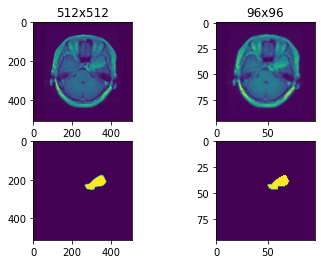

In [3]:
matfile = loadmat(paths[0])
print(matfile['cjdata'].keys())
image = matfile['cjdata']['image']
mask = matfile['cjdata']['tumorMask']

plt.subplot(2, 2, 1)
plt.title('512x512')
plt.imshow(image)

plt.subplot(2, 2, 3)
plt.imshow(mask)

image = resize(image, (96, 96))
mask = resize(mask, (96, 96))

plt.subplot(2, 2, 2)
plt.title('96x96')
plt.imshow(image)
plt.subplot(2, 2, 4)
plt.imshow(mask)

### making input structure

In [19]:
# label = ['Meningioma', 'glioma', 'Pituitary tumor']
for path in paths:
    i = 0
    file_name = path.split('\\')[-1].split('.')[0]
    image_file_name = f'{file_name}.jpg'
    mask_file_name = f'{file_name}.png'
    
    matfile = loadmat(path)
    image = matfile['cjdata']['image']
    mask = matfile['cjdata']['tumorMask']
    label= str(int(matfile['cjdata']['label']))
    image_file_name = f'{file_name}_{label}.jpg'
    mask_file_name = f'{file_name}_{label}.png'
    
    # resize(512x512 to 96x96)
    image = resize(image, (96, 96))
    mask = resize(mask, (96, 96))
    #mask_path = os.path.join(label,mask_file_name)
    
    # image 실수 -> 정수 변환 (jpg로 저장하기 위해서)
    image_formatted = (image * 255 / np.max(image)).astype('uint8')
    image_jpg = Image.fromarray(image_formatted)
    image_jpg.save(os.path.join('.\\inputs_labeling\\Figshare\\images',image_file_name))
    #image_jpg.show()
    
    
    mask_png = Image.fromarray(mask)
    mask_png.save(os.path.join('.\\inputs_labeling\\Figshare\\masks\\0',mask_file_name), 'png')
    #mask_png.show()

In [115]:
print(len(paths))

3064


In [3]:
img_id = '720'
img = cv2.imread('./inputs/Figshare/images/720.jpg')
#cv2.imshow('img',img)
print(img.shape)
print(img[...,None].shape)
# mask = plt.imread(os.path.join('.\\inputs\\Figshare\\masks', str(i),
#                 '720.png'), cv2.IMREAD_GRAYSCALE)[..., None]
# print(macs)

mask = []
# for i in range(3):
#     mask.append(plt.imread(os.path.join('./inputs/Figshare/masks', str(i),
#                 '720.png'), cv2.IMREAD_GRAYSCALE))
    
# mask = np.dstack(mask)

(96, 96, 3)
(96, 96, 3, 1)


C:\Users\insea\AppData\Local\Temp\ipykernel_10044\224653056.py:26: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


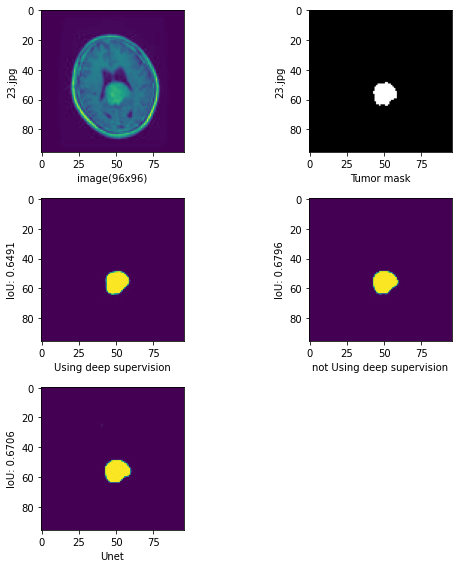

In [20]:
images = ["./inputs/Figshare/images/23.jpg",
          "./inputs/Figshare/masks/0/23.png",
          "./UNet++/Figshare_NestedUNet_wDS/0/23.jpg",
          "./UNet++/Figshare_NestedUNet_woDS/0/23.jpg",
          "./UNet++/Figshare_UNet_woDS/0/23.jpg"]
plt.subplots(2, 2, figsize=(8, 8))          
for i in range(1, 6):
    plt.subplot(3, 2, i)
    if(i == 1):
        plt.xlabel('image(96x96)')
        plt.ylabel('23.jpg')
    elif(i == 2):
        plt.xlabel('Tumor mask')
        plt.ylabel('23.jpg')    
    elif(i == 3):
        plt.xlabel('Using deep supervision')
        plt.ylabel('IoU: 0.6491')
        
    elif(i == 4):
        plt.xlabel('not Using deep supervision')
        plt.ylabel('IoU: 0.6796')
    
    elif(i == 5):
        plt.xlabel('Unet')
        plt.ylabel('IoU: 0.6706')
    plt.tight_layout()
    plt.imshow(Image.open(images[i-1]))

    

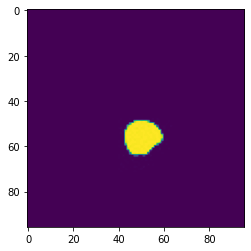

In [5]:
plt.imshow(Image.open(images[i-1]))
    